In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from time import time
import gensim
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
import pandas as pd

# Load data from CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Reviews.csv")

# Display the first few rows of the DataFrame
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
#Filter rows where HelpfulnessDenominator is 0 and calculate the resulting DataFrame shape.
df[df.HelpfulnessDenominator == 0].shape

'''So, filtering rows where HelpfulnessDenominator is 0 would essentially filter out reviews where no users
have indicated whether they found the review helpful or not. This could be useful for various reasons,
such as focusing on reviews that have received feedback from users.'''

'So, filtering rows where HelpfulnessDenominator is 0 would essentially filter out reviews where no users\nhave indicated whether they found the review helpful or not. This could be useful for various reasons, \nsuch as focusing on reviews that have received feedback from users.'

In [6]:
#Get information about the number of data points in the dataset
print("Number of datapoints: ",df.shape[0])
print("Number of features: ",df.shape[1])

Number of datapoints:  568454
Number of features:  10


In [7]:
# Define the number of reviews to extract from each rating class
num_reviews_per_class = 29770

# Create empty list to store balanced data
balanced_data1 = []

# Iterate through each rating class
for score in range(1, 6):
    # Filter reviews for the current rating class and select a fixed number of reviews
    reviews_for_score = df[df['Score'] == score].head(num_reviews_per_class)

    # Append selected reviews to the balanced data list
    balanced_data1.append(reviews_for_score)

# Concatenate the balanced data DataFrames
balanced_data1 = pd.concat(balanced_data1, ignore_index=True)

# Shuffle the balanced dataset
balanced_data1 = balanced_data1.sample(frac=1).reset_index(drop=True)

# Display the balanced dataset
print("Balanced Dataset:")
print(balanced_data1.head())
print("\nNumber of data points in our data:", len(balanced_data1))

# Print sample dataset from each class (1 to 5)
for score in range(1, 6):
    print(f"\nSample dataset for rating class {score}:")
    sample_data = balanced_data1[balanced_data1['Score'] == score].sample(5)
    print(sample_data)


Balanced Dataset:
       Id   ProductId          UserId           ProfileName  \
0   38550  B003GSK4CW  A11IXJ8M1JO296  mkayreagan "marykay"   
1   82059  B008MSW15E  A29F4QM0SC4OFD               PeuAPeu   
2   50432  B000UH3QWW  A1X9QD2VBS5AW2                 CAGal   
3  160909  B00106SS66  A3JXTD1ZMAGEQ7          marcy fuller   
4  134829  B000SKS8JM   A31UJUB82AWL1         Dean Guattare   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     3                       3      5  1326672000   
1                     0                       0      4  1344470400   
2                     2                       3      1  1336089600   
3                     6                       8      1  1310428800   
4                    96                     134      1  1240963200   

                             Summary  \
0                      Great product   
1  A nice twist on plain tomato soup   
2                       Disappointed   
3                Misre

In [8]:
# Function to partition scores into positive (0) and negative (1)
def partition(x):
    return 0 if x > 3 else 1

# Create a copy of the DataFrame
balanced_data2 = balanced_data1.copy()

# Apply the partitioning function to the 'Score' column in the copy
balanced_data2['Score'] = balanced_data2['Score'].map(partition)

# Print the first few rows of the new DataFrame after applying the partitioning function
print("Data After Partitioning:")
print(balanced_data2.head())


#1 is negative review
#0 is positive review

Data After Partitioning:
       Id   ProductId          UserId           ProfileName  \
0   38550  B003GSK4CW  A11IXJ8M1JO296  mkayreagan "marykay"   
1   82059  B008MSW15E  A29F4QM0SC4OFD               PeuAPeu   
2   50432  B000UH3QWW  A1X9QD2VBS5AW2                 CAGal   
3  160909  B00106SS66  A3JXTD1ZMAGEQ7          marcy fuller   
4  134829  B000SKS8JM   A31UJUB82AWL1         Dean Guattare   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     3                       3      0  1326672000   
1                     0                       0      0  1344470400   
2                     2                       3      1  1336089600   
3                     6                       8      1  1310428800   
4                    96                     134      1  1240963200   

                             Summary  \
0                      Great product   
1  A nice twist on plain tomato soup   
2                       Disappointed   
3              

In [9]:
balanced_data2['Score'].value_counts()

Score
1    89309
0    59540
Name: count, dtype: int64

In [10]:

# Print the total number of rows
num_rows = balanced_data2.shape[0]
print("\n\n\nTotal number of rows in the DataFrame:", num_rows)





Total number of rows in the DataFrame: 148849


In [11]:
# Print one full review for positive class (0)
positive_review = balanced_data2[balanced_data2['Score'] == 0].iloc[0]  # Selecting the first positive review
print("Positive Review:")
print(positive_review['Text'])

# Print one full review for negative class (1)
negative_review = balanced_data2[balanced_data2['Score'] == 1].iloc[0]  # Selecting the first negative review
print("\nNegative Review:")
print(negative_review['Text'])



Positive Review:
These pumps make it so easy to dispense Torani syrups. No mess and consistent amount. Be sure to draw syrup into the tube on first use before inserting into the bottle - otherwise you'll spill it over the top of the bottle. NBD. Possible negative is how tall they make the bottles 15" tall. I keep mine on the wet bar counter where I've set up my "coffee bar," so height isn't a problem for me.

Negative Review:
Extremely disappointed in the lack of quality for this product.  I ordered two boxes, to be used at a wedding for a candy buffet, and BOTH boxes arrived with every single candy stick broken in multiple places.  Out of 160 sticks (total), not ONE was unbroken.  It is beyond me how a company can ship fragile merchandise so carelessly. Very very disappointed.


In [12]:
# Filter out rows where 'Score' is not equal to 3  'UserId' is "AR5J8UI46CURR"
balanced_data3 = balanced_data2[(balanced_data2['Score'] != 3) | (balanced_data2['UserId'] == "AR5J8UI46CURR")]

# Sort the filtered DataFrame by 'ProductId'
balanced_data3 = balanced_data3.sort_values(by='ProductId')

# Print the filtered and sorted DataFrame
print("Filtered and Sorted DataFrame:")
print(balanced_data3.head())


# Print the total number of rows
num_rows3 = balanced_data3.shape[0]
print("\n\n\nTotal number of rows in the DataFrame:", num_rows3)

Filtered and Sorted DataFrame:
            Id   ProductId          UserId  \
130485  150522  0006641040  A1S3C5OFU508P3   
108463  150523  0006641040  A2P4F2UO0UMP8C   
48533   150529  0006641040   A25ACLV5KPB4W   
125280  150497  0006641040  A1HKYQOFC8ZZCH   
110272  150493  0006641040   AMX0PJKV4PPNJ   

                                  ProfileName  HelpfulnessNumerator  \
130485                      Charles Ashbacher                     0   
108463  Elizabeth A. Curry "Lovely Librarian"                     0   
48533                     Matt Hetling "Matt"                     0   
125280             Maria Apolloni "lanarossa"                     2   
110272               E. R. Bird "Ramseelbird"                    71   

        HelpfulnessDenominator  Score        Time  \
130485                       0      0  1219536000   
108463                       0      0  1096675200   
48533                        1      0  1108425600   
125280                       2      1  1334707200   


In [13]:
balanced_data3['Score'].value_counts()

Score
1    89309
0    59540
Name: count, dtype: int64

In [14]:
# Sorting data according to ProductId in ascending order
balanced_data4 = balanced_data3.sort_values(by='ProductId', ascending=True)
print("Sorted DataFrame:")
balanced_data4.head(5)


Sorted DataFrame:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
130485,150522,0006641040,A1S3C5OFU508P3,Charles Ashbacher,0,0,0,1219536000,Children will find it entertaining and a gener...,This book contains a collection of twelve shor...
100208,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,0,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
62893,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,0,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...
20319,150526,0006641040,A3E9QZFE9KXH8J,R. Mitchell,11,18,1,1129507200,awesome book poor size,This is one of the best children's books ever ...
62958,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,0,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...


In [15]:
# Deduplication of entries based on certain columns
balanced_data5 = balanced_data4.drop_duplicates(subset=["UserId", "ProfileName", "Time", "Text"], keep='first')

# Display the shape of the deduplicated DataFrame
print("Shape of Deduplicated DataFrame:", balanced_data5.shape)

Shape of Deduplicated DataFrame: (117061, 10)


In [16]:
''' it was noted that in the two rows presented below, the HelpfulnessNumerator surpasses the HelpfulnessDenominator, a
scenario that is impractical. Consequently, these two rows have been omitted from the computations. This discrepancy is
logically implausible as the numerator cannot exceed the denominator.'''
# Filter out rows where HelpfulnessNumerator is greater than HelpfulnessDenominator
balanced_data6 = balanced_data5[balanced_data5['HelpfulnessNumerator'] <= balanced_data5['HelpfulnessDenominator']]

# Display the shape of the DataFrame after filtering
print("Shape after HelpfulnessNumerator check:", balanced_data6.shape)

Shape after HelpfulnessNumerator check: (117060, 10)


In [17]:
# Display the value counts of 'Score' column
print("Value Counts of Score Column:")
print(balanced_data6['Score'].value_counts())

Value Counts of Score Column:
Score
1    65427
0    51633
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split

# Split the balanced_data6 into features (X) and target variable (y)
X = balanced_data6['Text']  # Features
y = balanced_data6['Score']  # Target variable

# Step 1: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (93648,)
Shape of X_test: (23412,)
Shape of y_train: (93648,)
Shape of y_test: (23412,)


In [19]:
import nltk
from nltk.tokenize import word_tokenize
import regex as re


# Preprocess text function
def preprocess_text(text):
    """Preprocess text by removing HTML tags, punctuation, special characters, and non-alphanumeric characters."""
    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove punctuation, special characters, and non-alphanumeric characters
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    return clean_text

# Tokenization function
def tokenize_text(text):
    """Tokenize text using NLTK word_tokenize."""
    tokens = word_tokenize(text)
    return tokens


In [20]:
pip install nltk

In [22]:


import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))
# Words to exclude from stopwords
excluding = {'against', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

# Exclude specified words from stopwords
stop_words = stop_words - excluding


# Function to remove stop words from text
def remove_stopwords(text):
    """Remove stopwords from text."""
    tokens = text.split()  # Tokenize text into words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Filter out stopwords
    filtered_text = ' '.join(filtered_tokens)  # Join filtered tokens back into text
    return filtered_text

In [29]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on text
def lemmatize_text(text):
    """Lemmatize text using NLTK WordNetLemmatizer."""
    tokens = nltk.word_tokenize(text)  # Tokenize text into words
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]  # Lemmatize tokens (assumes verbs)
    lemmatized_text = ' '.join(lemmatized_tokens)  # Join lemmatized tokens back into text
    return lemmatized_text

In [24]:
#Removing contractions from data
import re

# Dictionary of English contractions
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

In [25]:
def expand_contractions(text, contractions_dict):
    # Regular expression for finding contractions
    contractions_pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b', flags=re.IGNORECASE)

    # Preprocess the keys of contractions_dict to lowercase
    processed_dict = {key.lower(): value for key, value in contractions_dict.items()}

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = processed_dict.get(match.lower(), match)
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

In [26]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

#  import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...


In [27]:
nltk.download ('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
# Apply preprocessing functions to X_train
X_train_preprocessed = X_train.apply(preprocess_text)
X_train_preprocessed = X_train_preprocessed.apply(remove_stopwords)
X_train_preprocessed = X_train_preprocessed.apply(lemmatize_text)
X_train_preprocessed = X_train_preprocessed.apply(expand_contractions, contractions_dict=contractions_dict)


In [31]:
print("Shape of X_train:", X_train_preprocessed.shape)

Shape of X_train: (93648,)


In [32]:
#printing one train case
print(X_train_preprocessed.iloc[0])


last food product mean ingest humans dog buy Amazon not list complete ingredients product information dismay open package find first ingredient list SUCROSE second DEXTROSE MALTODEXTRIN one ingredients natural product two dye include packet go straight garbage belong buy Amazon stop sell DentaCleans Sugar Free Breath Mints Dogs BIG MISTAKE


In [33]:
# Apply preprocessing functions to X_test
X_test_preprocessed = X_test.apply(preprocess_text)
X_test_preprocessed = X_test_preprocessed.apply(remove_stopwords)
X_test_preprocessed = X_test_preprocessed.apply(lemmatize_text)
X_test_preprocessed = X_test_preprocessed.apply(expand_contractions,  contractions_dict=contractions_dict)

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on X_train and transform X_train
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_preprocessed)

# Transform X_test using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test_preprocessed)


In [34]:
#printing one test case
print(X_test_preprocessed.iloc[0])


Ive drink Honest brand products mix success lemonade leave much desire drink prove little better since love hate relationship pomegranate flavor things could little bias well Sometimes theyre fantastic time theyre fairly lacklusterPomegranate Blue flavor juice make Pomegranates Blueberries taste strongly Pomegranates rather blueberries fact didnt really taste blueberries pomegranate kind mute drink taste like water version fruit juice wasnt sweet actually ok bottle advertise tad sweet live expectation Someone look sugary koolaid type product probably not go fond taste productThe ingredients healthy good Honest brand know little disappoint juice concentrate least healthier concentrate good portion ingredients organic well always plus sweetener organic cane sugar nasty artificial sweeteners Although bite surprise didnt go stevia drink watch diet theres 100 calories 169 fl oz bottle juices surprise see grape juice higher content pomegranate blueberry juices kind disappoint since name drin

In [72]:
print("Number of attributes in X_train:", X_train_tfidf[:10, :].shape[1])
# Print the first 10 rows and columns of the TF-IDF matrix
#print(X_train_tfidf.toarray()[:30, :30])

Number of attributes in X_train: 126236


In [37]:
print("Number of attributes in X_test:", X_test_tfidf[:10, :].shape[1])


Number of attributes in X_test: 126236


In [38]:
from sklearn.svm import SVC

# Initialize SVM model with probability estimates enabled
svm_model2 = SVC(kernel='linear', probability=True)


In [39]:
import time

start_time = time.time()  # Record the start time

svm_model2.fit(X_train_tfidf, y_train)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate the elapsed time

print("Training time:", elapsed_time, "seconds")


Training time: 15311.64187335968 seconds


In [40]:
print(svm_model2.coef_)  # Print the coefficients of the model
print(svm_model2.intercept_)  # Print the intercept of the model

  (0, 99920)	0.12390302021494988
  (0, 95145)	0.13166750039129016
  (0, 87382)	0.12712557065053828
  (0, 23082)	0.13166750039129016
  (0, 8974)	0.3325495339905108
  (0, 84713)	0.1733816969630186
  (0, 77930)	0.1795762609827399
  (0, 42038)	0.1733816969630186
  (0, 36899)	0.1795762609827399
  (0, 82339)	0.31455587769046267
  (0, 69873)	0.2783683775543619
  (0, 19212)	0.2783683775543619
  (0, 122256)	0.10195226255915946
  (0, 90475)	0.0984353733338133
  (0, 66089)	0.4078090502366378
  (0, 123185)	0.05949580885626443
  (0, 111367)	0.05949580885626443
  (0, 106596)	0.05949580885626443
  (0, 97378)	0.05949580885626443
  (0, 83210)	0.05949580885626443
  (0, 77804)	0.11899161771252886
  (0, 77801)	0.11899161771252886
  (0, 68499)	0.05949580885626443
  (0, 52313)	0.057443474127562996
  (0, 4249)	0.05949580885626443
  :	:
  (0, 31032)	1.768928012879309
  (0, 31019)	0.9514284923915067
  (0, 25103)	0.46055550938682394
  (0, 23052)	-0.12384419546133296
  (0, 17394)	-1.0606646564260802
  (0, 16680)

In [41]:
# Use the trained SVM model to make predictions on the TF-IDF vectorized testing data
y_pred = svm_model2.predict(X_test_tfidf)

print(y_pred)

[1 1 0 ... 0 1 1]


In [42]:
#measuring the accuracy of the data set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [43]:
# Importing the classification_report function from scikit-learn's metrics module
from sklearn.metrics import classification_report


# Generating a classification report by comparing the true labels (y_test) with the predicted labels (y_pred)
report = classification_report(y_test, y_pred)

# Printing the classification report
print(report)



              precision    recall  f1-score   support

           0       0.81      0.80      0.81     10244
           1       0.84      0.86      0.85     13168

    accuracy                           0.83     23412
   macro avg       0.83      0.83      0.83     23412
weighted avg       0.83      0.83      0.83     23412



In [44]:
# Importing necessary functions from scikit-learn's metrics module
from sklearn.metrics import roc_curve, roc_auc_score

# Calculating the ROC curve, which plots the true positive rate (TPR) against the false positive rate (FPR)
# The roc_curve function takes the true labels (y_test) and the predicted probabilities or scores (y_pred) as input
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculating the Area Under the Curve (AUC) score, which quantifies the overall performance of the classifier
# The roc_auc_score function takes the true labels (y_test) and the predicted probabilities or scores (y_pred) as input
auc = roc_auc_score(y_test, y_pred)

# Printing the Area Under the Curve (AUC) score
print("AUC Score:", auc)


AUC Score: 0.8276723078393872


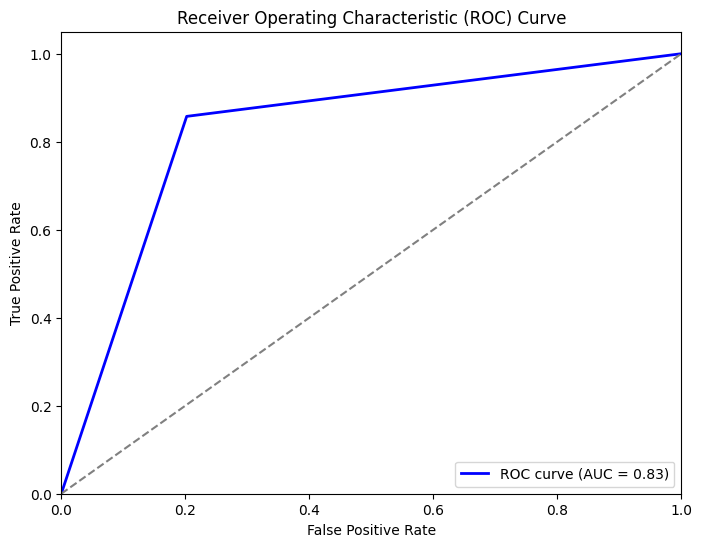

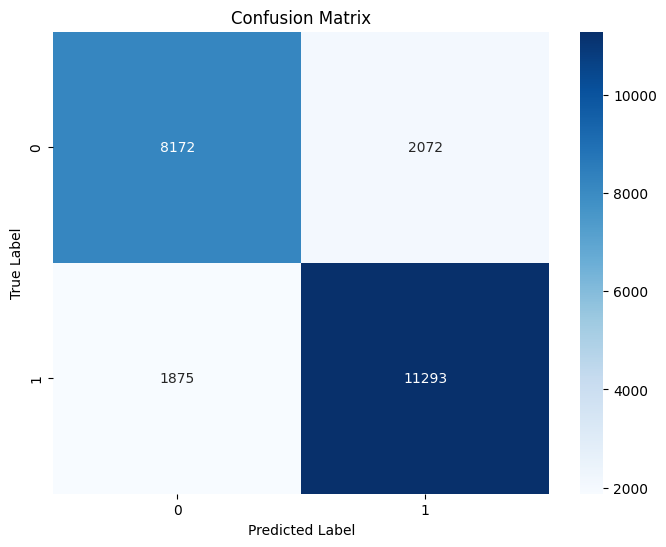

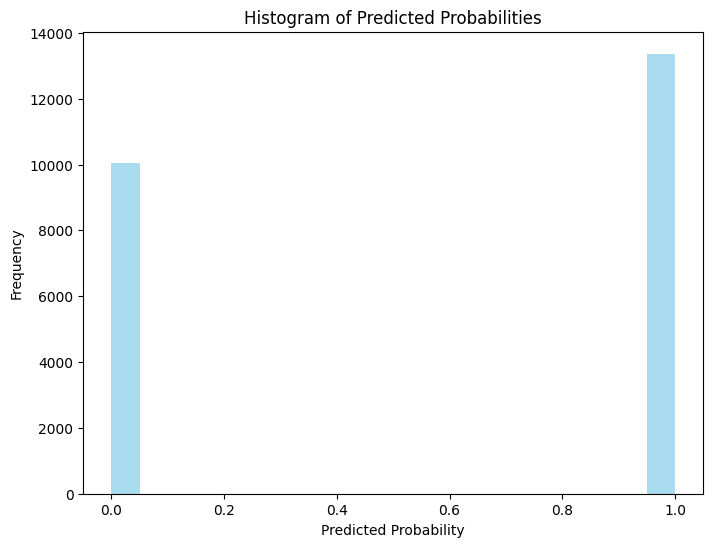

In [45]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='skyblue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


In [47]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=f7e7e29edb78b9db948a6462339488e550234fc499a82de6de71a7a9990a5aa8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [59]:
index_values = X_test_preprocessed.index.tolist()
print(index_values)

#index_values1 = y_train.index
#print(index_values1)

[112368, 140029, 52453, 89233, 82758, 3900, 33495, 30422, 110012, 5561, 70139, 77147, 105498, 58543, 145092, 86370, 10128, 121391, 137665, 94687, 74189, 78904, 98010, 21784, 102868, 109113, 63421, 25971, 74287, 56117, 101316, 129985, 114885, 34615, 109054, 130048, 127812, 59612, 50237, 105407, 114170, 129540, 8844, 17216, 69332, 7118, 67115, 76816, 23848, 137669, 49337, 92069, 66546, 54134, 117774, 131612, 66969, 66276, 91779, 139600, 131780, 4553, 129098, 58111, 135052, 84076, 69820, 98061, 112529, 144984, 56522, 59821, 71037, 143367, 118033, 4448, 99442, 2244, 45927, 117508, 85445, 44716, 97071, 46193, 52019, 79344, 94628, 100567, 2540, 28603, 57047, 4039, 41774, 16064, 112792, 100090, 47651, 84869, 15338, 43646, 19777, 15197, 18324, 111852, 5863, 13384, 17581, 46187, 63373, 99661, 103451, 69587, 125117, 89085, 107008, 66406, 22070, 112333, 47366, 62705, 56038, 12649, 98076, 138461, 89543, 83989, 99233, 106300, 12674, 79385, 45742, 7125, 23279, 118629, 17407, 95927, 36806, 55602, 138

In [95]:
from lime.lime_text import LimeTextExplainer
import random

# Pick a random index from index_values
random_index = random.choice(index_values)

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=['positive', 'negative'])

# Define a prediction function
def predict_proba_func(texts):
    # Transform the text into TF-IDF vectors
    tfidf_vectorizer.transform(texts)
    # Make predictions using the trained SVM model
    return svm_model2.predict_proba(text_tfidf)


# Generate explanation for a specific instance
exp = explainer.explain_instance(X_test_preprocessed[random_index], predict_proba_func, num_features=6)




In [185]:
tf_idf_preprocessed = tfidf_vectorizer.transform(X_test_preprocessed)

prediction = svm_model2.predict(tf_idf_preprocessed)


[1 1 0 ... 0 1 1]


'four Chihuahuas seem interest treat didnt seem know quite first lick walk away Finally one manage crunch one eat next day thing think like treat would better suit larger dog'

Review: four Chihuahuas seem interest treat didnt seem know quite first lick walk away Finally one manage crunch one eat next day thing think like treat would better suit larger dog

True Class: positive

Predicted Class: positive 

[('away', -0.016860010462174748), ('suit', 0.014178772858662746), ('interest', 0.012259897243374517), ('next', 0.012177068431643463), ('thing', -0.010454214844255485), ('crunch', -0.010218364803691583)]


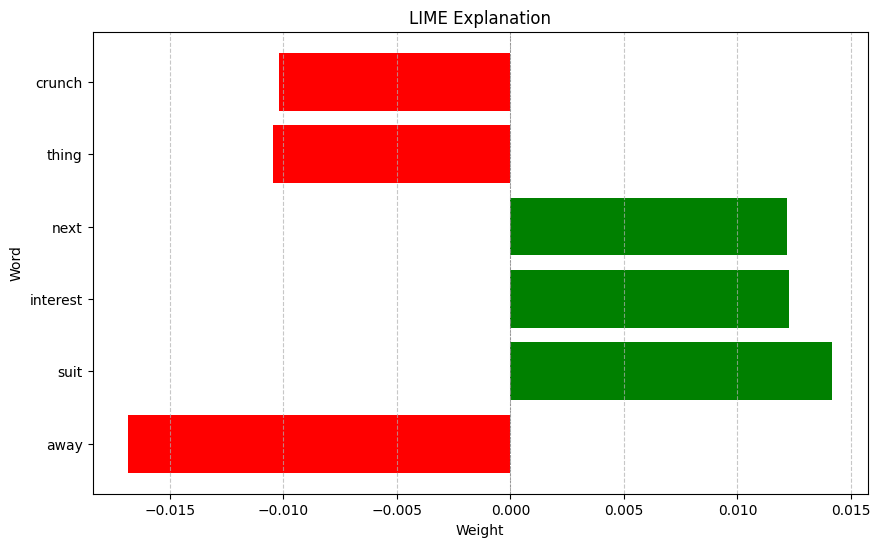

In [186]:
# Print the explanation
print('Review:', X_test_preprocessed[random_index])
print('\nTrue Class:', 'positive' if y_test[random_index] == 0 else 'negative')

# Get the predicted class
predicted_class_index = prediction.argmax()
predicted_class = 'positive' if predicted_class_index == 0 else 'negative'
print('\nPredicted Class:', predicted_class, "\n")

print(exp.as_list())

# Get words and weights from LIME explanation
exp_words_weights = exp.as_list()
words = [word for word, _ in exp_words_weights]
weights = [weight for _, weight in exp_words_weights]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(words, weights, color=['red' if w < 0 else 'green' for w in weights])
plt.xlabel('Weight')
plt.ylabel('Word')
plt.title('LIME Explanation')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [75]:
pip install h5py

In [116]:
from sklearn.svm import SVC
import joblib

# Save the model using joblib
joblib.dump(svm_model2, 'svm_model.pkl')

['svm_model.pkl']

In [104]:
from sklearn.naive_bayes import MultinomialNB
import time

# Instantiate the Naive Bayes model
nb_model = MultinomialNB()

# Naive Bayes Model


In [108]:
start_time1 = time.time()  # Record the start time

# Train the Naive Bayes model
nb_model.fit(X_train_tfidf, y_train)

end_time1 = time.time()  # Record the end time
elapsed_time1 = end_time1 - start_time1  # Calculate the elapsed time

print("Training time:", elapsed_time1, "seconds")

Training time: 0.036104440689086914 seconds


In [111]:
# Use the trained Naive Bayes model to make predictions on the TF-IDF vectorized testing data
# Print the first 50 values of the predictions

y_pred1 = nb_model.predict(X_test_tfidf)
print("First 50 values of predictions:")
print(y_pred1[:50])

First 50 values of predictions:
[1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 0]


In [112]:
#measuring the accuracy of the data set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1)

In [113]:
# Importing the classification_report function from scikit-learn's metrics module
from sklearn.metrics import classification_report

# Assuming y_pred contains the predicted labels for X_test

# Generating a classification report by comparing the true labels (y_test) with the predicted labels (y_pred)
report = classification_report(y_test, y_pred1)

# Printing the classification report
print(report)



              precision    recall  f1-score   support

           0       0.89      0.54      0.67     10244
           1       0.72      0.95      0.82     13168

    accuracy                           0.77     23412
   macro avg       0.81      0.74      0.75     23412
weighted avg       0.80      0.77      0.76     23412



In [114]:
# Importing necessary functions from scikit-learn's metrics module
from sklearn.metrics import roc_curve, roc_auc_score

# Calculating the ROC curve, which plots the true positive rate (TPR) against the false positive rate (FPR)
# The roc_curve function takes the true labels (y_test) and the predicted probabilities or scores (y_pred) as input
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

# Calculating the Area Under the Curve (AUC) score, which quantifies the overall performance of the classifier
# The roc_auc_score function takes the true labels (y_test) and the predicted probabilities or scores (y_pred) as input
auc = roc_auc_score(y_test, y_pred1)

# Printing the Area Under the Curve (AUC) score
print("AUC Score:", auc)


AUC Score: 0.7431613200484128


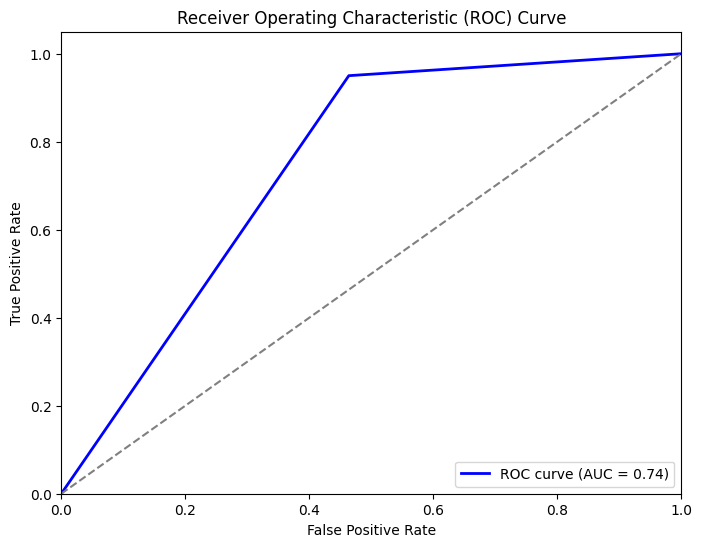

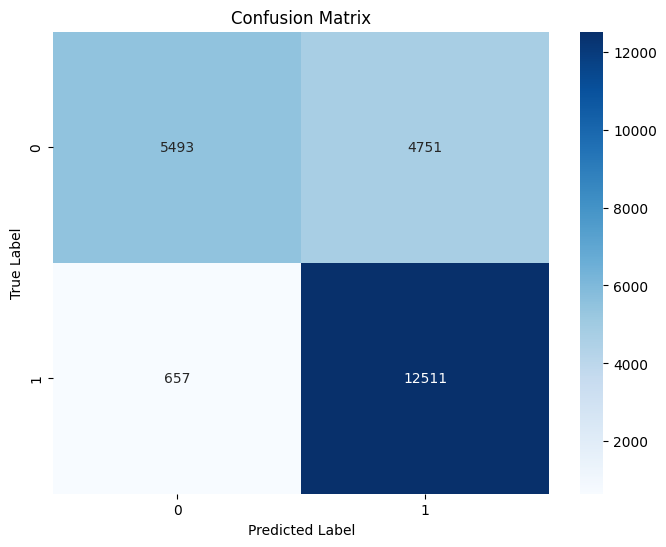

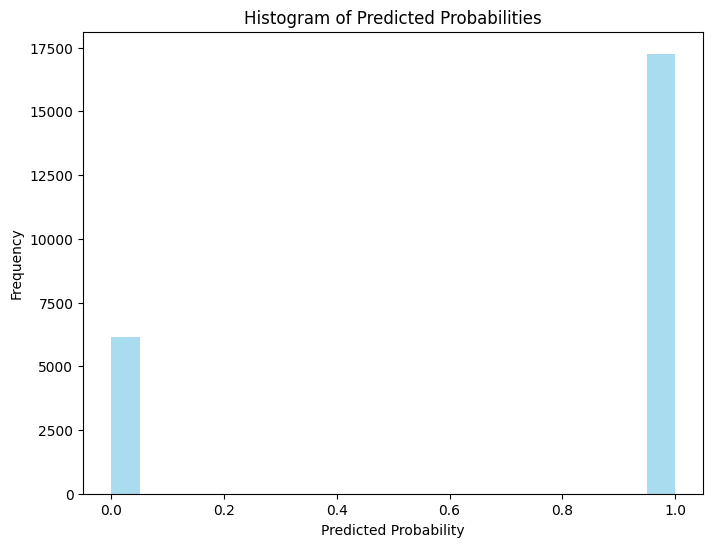

In [115]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='skyblue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()
